In [8]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# plt.style.use('ggplot') 

basepath = os.path.join('~', 'development', 'bigd', 'trypandas/')
df1 = pd.read_csv(basepath + 'titanic.csv')
# print(df1.at[4,3])

df2 = df1.groupby(['PClass', 'Sex', 'Survived'])['Age'].min()
print(df2)
print(df2.unstack(1))
print(df2.unstack(0))
# print(df1.loc[:5, ['Name', 'Age', 'Survived']])
# print(df1.mean())
# print(df1.loc[df1.Age <10, ['Name', 'Age']])
# avgAgePerClass = df1.groupby(['PClass'])['Age'].mean()

# avgAgePerClass.plot(kind='bar')
# print (avgAgePerClass)
# count = df1['Age'].value_counts()
# count.iloc[:10].plot(kind='bar')
# count[:10].plot(figsize=(15, 5), kind='bar')
# df1.pivot_table(index=['Sex'], columns=['PClass'], values='Name', aggfunc='count').plot(figsize=(10, 5))



PClass  Sex     Survived
*       male    0             NaN
1st     female  0            2.00
                1           14.00
        male    0           18.00
                1            0.92
2nd     female  0           18.00
                1            1.00
        male    0           14.00
                1            0.80
3rd     female  0            1.50
                1            0.17
        male    0            0.33
                1            0.83
Name: Age, dtype: float64
Sex              female   male
PClass Survived               
*      0            NaN    NaN
1st    0           2.00  18.00
       1          14.00   0.92
2nd    0          18.00  14.00
       1           1.00   0.80
3rd    0           1.50   0.33
       1           0.17   0.83
PClass            *    1st   2nd   3rd
Sex    Survived                       
female 0        NaN   2.00  18.0  1.50
       1        NaN  14.00   1.0  0.17
male   0        NaN  18.00  14.0  0.33
       1        NaN   0.92   0.8 

In [12]:
dates = pd.date_range('20130101', periods=5)
dates



DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05'],
              dtype='datetime64[ns]', freq='D')

In [13]:
s = pd.Series([1,3,5,np.nan,8], index=dates)
s



2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    8.0
Freq: D, dtype: float64

In [14]:
df1 = pd.DataFrame([np.random.randint(0,50, size=5) for i in range(5)], index=dates, columns=list('ABCDE'))

df1

,A,B,C,D,E
2013-01-01,45,45,36,30,21
2013-01-02,42,2,42,49,27
2013-01-03,48,6,25,30,28
2013-01-04,40,5,4,14,23
2013-01-05,34,49,17,33,19


In [15]:
df1.dtypes

A    int64
B    int64
C    int64
D    int64
E    int64
dtype: object

In [16]:
df1.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00
A,45,42,48,40,34
B,45,2,6,5,49
C,36,42,25,4,17
D,30,49,30,14,33
E,21,27,28,23,19


In [17]:
df1.sort_values(by='C', ascending=False)

,A,B,C,D,E
2013-01-02,42,2,42,49,27
2013-01-01,45,45,36,30,21
2013-01-03,48,6,25,30,28
2013-01-05,34,49,17,33,19
2013-01-04,40,5,4,14,23


In [18]:
df1.C.sort_values(ascending=False)

2013-01-02    42
2013-01-01    36
2013-01-03    25
2013-01-05    17
2013-01-04     4
Name: C, dtype: int64

In [19]:
df1[:3]

,A,B,C,D,E
2013-01-01,45,45,36,30,21
2013-01-02,42,2,42,49,27
2013-01-03,48,6,25,30,28


In [20]:
df1.loc[dates[3]]

A    40
B     5
C     4
D    14
E    23
Name: 2013-01-04 00:00:00, dtype: int64

In [21]:
df1.loc[dates[:3],['C','E']]

,C,E
2013-01-01,36,21
2013-01-02,42,27
2013-01-03,25,28


In [22]:
df1.iloc[2:4,:-1]

,A,B,C,D
2013-01-03,48,6,25,30
2013-01-04,40,5,4,14


In [23]:
df1[df1.D > 0]

,A,B,C,D,E
2013-01-01,45,45,36,30,21
2013-01-02,42,2,42,49,27
2013-01-03,48,6,25,30,28
2013-01-04,40,5,4,14,23
2013-01-05,34,49,17,33,19


In [24]:
df2 = df1.copy()
df2['G'] = ['one', 'one','two','three','four']
df2

,A,B,C,D,E,G
2013-01-01,45,45,36,30,21,one
2013-01-02,42,2,42,49,27,one
2013-01-03,48,6,25,30,28,two
2013-01-04,40,5,4,14,23,three
2013-01-05,34,49,17,33,19,four


In [25]:
df2[df2['G'].isin(['two', 'three'])]

,A,B,C,D,E,G
2013-01-03,48,6,25,30,28,two
2013-01-04,40,5,4,14,23,three


In [26]:
df2.loc[:,'E'] = np.array([5]*len(df2))
df2.loc[:,'G'] = [i for i in range(len(df2))]
df2

,A,B,C,D,E,G
2013-01-01,45,45,36,30,5,0
2013-01-02,42,2,42,49,5,1
2013-01-03,48,6,25,30,5,2
2013-01-04,40,5,4,14,5,3
2013-01-05,34,49,17,33,5,4


In [27]:
df3 = df2.reindex(index=dates[0:5], columns=list(df2.columns) + ['F'])
df3 = df3.fillna(value=34)
df3

,A,B,C,D,E,G,F
2013-01-01,45,45,36,30,5,0,34.0
2013-01-02,42,2,42,49,5,1,34.0
2013-01-03,48,6,25,30,5,2,34.0
2013-01-04,40,5,4,14,5,3,34.0
2013-01-05,34,49,17,33,5,4,34.0


In [28]:
df3.sub(s, axis='index')

,A,B,C,D,E,G,F
2013-01-01,44.0,44.0,35.0,29.0,4.0,-1.0,33.0
2013-01-02,39.0,-1.0,39.0,46.0,2.0,-2.0,31.0
2013-01-03,43.0,1.0,20.0,25.0,0.0,-3.0,29.0
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,26.0,41.0,9.0,25.0,-3.0,-4.0,26.0


In [29]:
df3.apply(np.cumsum)

,A,B,C,D,E,G,F
2013-01-01,45,45,36,30,5,0,34.0
2013-01-02,87,47,78,79,10,1,68.0
2013-01-03,135,53,103,109,15,3,102.0
2013-01-04,175,58,107,123,20,6,136.0
2013-01-05,209,107,124,156,25,10,170.0


In [30]:
df3.apply(lambda x: x.max() - x.min())

A    14.0
B    47.0
C    38.0
D    35.0
E     0.0
G     4.0
F     0.0
dtype: float64

In [31]:
print (df3)
print([df3.iloc[:, i].value_counts() for i in range(7)])

             A   B   C   D  E  G     F
2013-01-01  45  45  36  30  5  0  34.0
2013-01-02  42   2  42  49  5  1  34.0
2013-01-03  48   6  25  30  5  2  34.0
2013-01-04  40   5   4  14  5  3  34.0
2013-01-05  34  49  17  33  5  4  34.0
[40    1
45    1
34    1
42    1
48    1
Name: A, dtype: int64, 5     1
6     1
45    1
2     1
49    1
Name: B, dtype: int64, 17    1
4     1
36    1
42    1
25    1
Name: C, dtype: int64, 30    2
14    1
33    1
49    1
Name: D, dtype: int64, 5    5
Name: E, dtype: int64, 4    1
3    1
2    1
1    1
0    1
Name: G, dtype: int64, 34.0    5
Name: F, dtype: int64]


In [32]:
s  = pd.Series(np.random.randint(0,50,size=10))
s

0    35
1    15
2    27
3    23
4     0
5    28
6    12
7    16
8    46
9    37
dtype: int64

In [33]:
s.value_counts()

15    1
46    1
12    1
28    1
27    1
23    1
16    1
37    1
35    1
0     1
dtype: int64

In [34]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [35]:
df = pd.DataFrame(np.random.randn(7, 7))
df

,0,1,2,3,4,5,6
0,1.468644,1.167552,-0.537678,-1.892241,0.000859,0.115789,-0.775272
1,-0.853037,0.854809,-1.503311,-0.380013,1.665325,-0.253596,-1.559231
2,0.055206,-1.530690,0.166242,2.723207,0.767789,-0.415572,-0.861389
3,0.467379,-0.335795,-1.596598,0.182466,-0.833371,0.612599,0.989356
4,-0.855325,-0.841095,0.905629,0.314485,-1.277566,1.418350,0.290975
5,0.268416,-1.194117,-0.091304,0.234447,0.754934,-0.515356,-0.385156
6,1.568288,-0.810152,1.724130,-0.026189,0.590031,-0.491875,1.165444


In [36]:
pieces = [df[:3], df[3:5], df[5:]]
for piece in pieces:
    print (piece)

          0         1         2         3         4         5         6
0  1.468644  1.167552 -0.537678 -1.892241  0.000859  0.115789 -0.775272
1 -0.853037  0.854809 -1.503311 -0.380013  1.665325 -0.253596 -1.559231
2  0.055206 -1.530690  0.166242  2.723207  0.767789 -0.415572 -0.861389
          0         1         2         3         4         5         6
3  0.467379 -0.335795 -1.596598  0.182466 -0.833371  0.612599  0.989356
4 -0.855325 -0.841095  0.905629  0.314485 -1.277566  1.418350  0.290975
          0         1         2         3         4         5         6
5  0.268416 -1.194117 -0.091304  0.234447  0.754934 -0.515356 -0.385156
6  1.568288 -0.810152  1.724130 -0.026189  0.590031 -0.491875  1.165444


In [37]:
pd.concat(pieces)

,0,1,2,3,4,5,6
0,1.468644,1.167552,-0.537678,-1.892241,0.000859,0.115789,-0.775272
1,-0.853037,0.854809,-1.503311,-0.380013,1.665325,-0.253596,-1.559231
2,0.055206,-1.530690,0.166242,2.723207,0.767789,-0.415572,-0.861389
3,0.467379,-0.335795,-1.596598,0.182466,-0.833371,0.612599,0.989356
4,-0.855325,-0.841095,0.905629,0.314485,-1.277566,1.418350,0.290975
5,0.268416,-1.194117,-0.091304,0.234447,0.754934,-0.515356,-0.385156
6,1.568288,-0.810152,1.724130,-0.026189,0.590031,-0.491875,1.165444


In [38]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [3, 4]})
superleft = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
superright = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [3, 4]})
left

,key,lval
0,foo,1
1,foo,2


In [39]:
right

,key,rval
0,foo,3
1,foo,4


In [40]:
left.merge(right, on='key')

,key,lval,rval
0,foo,1,3
1,foo,1,4
2,foo,2,3
3,foo,2,4


In [41]:
superleft.merge(superright, on='key')

,key,lval,rval
0,foo,1,3
1,bar,2,4


In [42]:
df = df.rename(columns=dict(zip(range(7), list('ABCDEFG'))))
df

,A,B,C,D,E,F,G
0,1.468644,1.167552,-0.537678,-1.892241,0.000859,0.115789,-0.775272
1,-0.853037,0.854809,-1.503311,-0.380013,1.665325,-0.253596,-1.559231
2,0.055206,-1.530690,0.166242,2.723207,0.767789,-0.415572,-0.861389
3,0.467379,-0.335795,-1.596598,0.182466,-0.833371,0.612599,0.989356
4,-0.855325,-0.841095,0.905629,0.314485,-1.277566,1.418350,0.290975
5,0.268416,-1.194117,-0.091304,0.234447,0.754934,-0.515356,-0.385156
6,1.568288,-0.810152,1.724130,-0.026189,0.590031,-0.491875,1.165444


In [43]:
s = df.iloc[0]
df.append(s, ignore_index=True)

,A,B,C,D,E,F,G
0,1.468644,1.167552,-0.537678,-1.892241,0.000859,0.115789,-0.775272
1,-0.853037,0.854809,-1.503311,-0.380013,1.665325,-0.253596,-1.559231
2,0.055206,-1.530690,0.166242,2.723207,0.767789,-0.415572,-0.861389
3,0.467379,-0.335795,-1.596598,0.182466,-0.833371,0.612599,0.989356
4,-0.855325,-0.841095,0.905629,0.314485,-1.277566,1.418350,0.290975
5,0.268416,-1.194117,-0.091304,0.234447,0.754934,-0.515356,-0.385156
6,1.568288,-0.810152,1.724130,-0.026189,0.590031,-0.491875,1.165444
7,1.468644,1.167552,-0.537678,-1.892241,0.000859,0.115789,-0.775272


In [44]:
dftitanic = pd.DataFrame({
    'Name': ['Elisabeth Walton',
             'Helen Loraine',
             'Joshua Creighton',
             'Waldo Daniels',
             'Leo Dicaprio'],
    'PClass': ['1st', '2nd', '3rd', '1st', '1st'],
    'Age': [29, 2, 30, 25, 33],
    'Sex': ['female', 'female', 'male', 'female', 'male']
})
dftitanic

,Age,Name,PClass,Sex
0,29,Elisabeth Walton,1st,female
1,2,Helen Loraine,2nd,female
2,30,Joshua Creighton,3rd,male
3,25,Waldo Daniels,1st,female
4,33,Leo Dicaprio,1st,male


In [45]:
dftitanic.groupby('PClass')['Name'].count()

PClass
1st    3
2nd    1
3rd    1
Name: Name, dtype: int64

In [46]:
dftitanic.groupby(['PClass', 'Sex'])['Name'].count()

PClass  Sex   
1st     female    2
        male      1
2nd     female    1
3rd     male      1
Name: Name, dtype: int64

In [47]:
tpl = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples=tpl, names=['first', 'second'])
dfresh = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
stacked = dfresh.stack()
stacked

first  second   
bar    one     A    0.457539
               B    1.070095
       two     A    0.892842
               B    0.596716
baz    one     A    1.120646
               B   -1.136478
       two     A   -0.257277
               B    0.354524
foo    one     A   -0.136589
               B   -0.199594
       two     A    0.820896
               B   -0.911653
qux    one     A   -0.819134
               B    0.291402
       two     A   -0.538440
               B    0.562675
dtype: float64

In [48]:
stacked.unstack()

A         B
first second                    
bar   one     0.457539  1.070095
      two     0.892842  0.596716
baz   one     1.120646 -1.136478
      two    -0.257277  0.354524
foo   one    -0.136589 -0.199594
      two     0.820896 -0.911653
qux   one    -0.819134  0.291402
      two    -0.538440  0.562675

In [49]:
stun = stacked.unstack(1)
stun

second        one       two
first                      
bar   A  0.457539  0.892842
      B  1.070095  0.596716
baz   A  1.120646 -0.257277
      B -1.136478  0.354524
foo   A -0.136589  0.820896
      B -0.199594 -0.911653
qux   A -0.819134 -0.538440
      B  0.291402  0.562675

In [50]:
pd.pivot_table(dftitanic, index='PClass', columns='Sex', values='Age')

Sex,female,male
PClass,,
1st,27.0,33.0
2nd,2.0,NaN
3rd,NaN,30.0


In [51]:
rngs = pd.date_range('12/10/2016', periods=100, freq='S')
rngs

DatetimeIndex(['2016-12-10 00:00:00', '2016-12-10 00:00:01',
               '2016-12-10 00:00:02', '2016-12-10 00:00:03',
               '2016-12-10 00:00:04', '2016-12-10 00:00:05',
               '2016-12-10 00:00:06', '2016-12-10 00:00:07',
               '2016-12-10 00:00:08', '2016-12-10 00:00:09',
               '2016-12-10 00:00:10', '2016-12-10 00:00:11',
               '2016-12-10 00:00:12', '2016-12-10 00:00:13',
               '2016-12-10 00:00:14', '2016-12-10 00:00:15',
               '2016-12-10 00:00:16', '2016-12-10 00:00:17',
               '2016-12-10 00:00:18', '2016-12-10 00:00:19',
               '2016-12-10 00:00:20', '2016-12-10 00:00:21',
               '2016-12-10 00:00:22', '2016-12-10 00:00:23',
               '2016-12-10 00:00:24', '2016-12-10 00:00:25',
               '2016-12-10 00:00:26', '2016-12-10 00:00:27',
               '2016-12-10 00:00:28', '2016-12-10 00:00:29',
               '2016-12-10 00:00:30', '2016-12-10 00:00:31',
               '2016-12-

In [52]:
ts = pd.Series(np.random.randint(0, 500, len(rngs)), index=rngs)
ts.resample('10S').mean() # or 1Min etc.

2016-12-10 00:00:00    266.0
2016-12-10 00:00:10    285.0
2016-12-10 00:00:20    216.0
2016-12-10 00:00:30    166.2
2016-12-10 00:00:40    219.5
2016-12-10 00:00:50    160.9
2016-12-10 00:01:00    205.7
2016-12-10 00:01:10    224.2
2016-12-10 00:01:20    227.0
2016-12-10 00:01:30    208.7
Freq: 10S, dtype: float64

In [53]:
rngd = pd.date_range('2012/10/16', periods=5, freq='D')
rngd

DatetimeIndex(['2012-10-16', '2012-10-17', '2012-10-18', '2012-10-19',
               '2012-10-20'],
              dtype='datetime64[ns]', freq='D')

In [54]:
tsd = pd.Series(np.random.randint(0, 100, len(rngd)), index=rngd)
tsd

2012-10-16     8
2012-10-17    41
2012-10-18    45
2012-10-19    10
2012-10-20    84
Freq: D, dtype: int64

In [55]:
tsd_utc = tsd.tz_localize('UTC')
tsd_utc

2012-10-16 00:00:00+00:00     8
2012-10-17 00:00:00+00:00    41
2012-10-18 00:00:00+00:00    45
2012-10-19 00:00:00+00:00    10
2012-10-20 00:00:00+00:00    84
Freq: D, dtype: int64

In [56]:
tsd_utc.tz_convert(tz='Europe/Moscow') #not correct

2012-10-16 04:00:00+04:00     8
2012-10-17 04:00:00+04:00    41
2012-10-18 04:00:00+04:00    45
2012-10-19 04:00:00+04:00    10
2012-10-20 04:00:00+04:00    84
Freq: D, dtype: int64

In [57]:
rng_m = pd.date_range('10/12/2016', periods=6, freq='M')
tsd_m = pd.Series(np.random.randn(len(rng_m)), index=rng_m)
ps = tsd_m.to_period()
ps

2016-10    1.120752
2016-11    0.128334
2016-12   -0.181054
2017-01   -1.183199
2017-02    0.420905
2017-03    0.590263
Freq: M, dtype: float64

In [58]:
ps.to_timestamp()

2016-10-01    1.120752
2016-11-01    0.128334
2016-12-01   -0.181054
2017-01-01   -1.183199
2017-02-01    0.420905
2017-03-01    0.590263
Freq: MS, dtype: float64

In [59]:
dfc = pd.DataFrame({'id': [1, 2, 3, 4, 5], 'raw_grade': [1, 2, 3, 4, 5]})
dfc

,id,raw_grade
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [60]:
dfc['grade'] = dfc['raw_grade'].astype('category')
dfc['grade']

0    1
1    2
2    3
3    4
4    5
Name: grade, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [61]:
dfc['grade'].cat.categories = ['очень плохо', 'плохо', 'удовлетворительно', 'хорошо', 'отлично']
dfc

,id,raw_grade,grade
0,1,1,очень плохо
1,2,2,плохо
2,3,3,удовлетворительно
3,4,4,хорошо
4,5,5,отлично


In [62]:
dfc.sort_values(by='grade', ascending=False)

,id,raw_grade,grade
4,5,5,отлично
3,4,4,хорошо
2,3,3,удовлетворительно
1,2,2,плохо
0,1,1,очень плохо


<IPython.core.display.Javascript object>


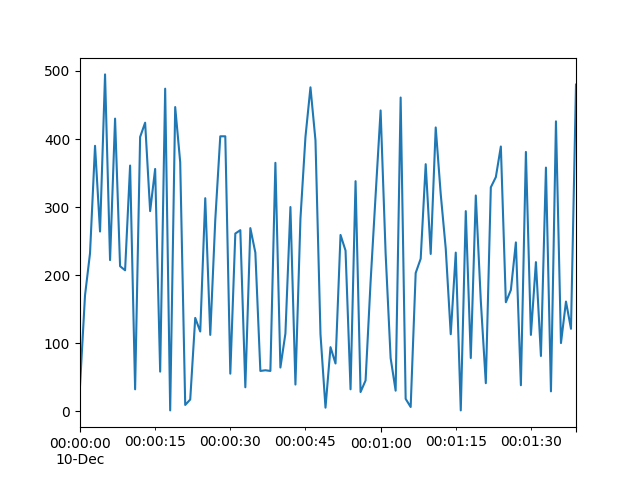

In [63]:
ts.plot()

<IPython.core.display.Javascript object>


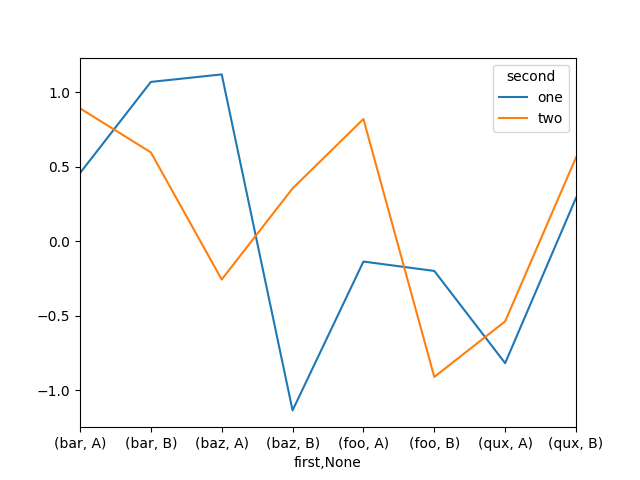

In [64]:
stun.plot()

In [65]:
stun


second        one       two
first                      
bar   A  0.457539  0.892842
      B  1.070095  0.596716
baz   A  1.120646 -0.257277
      B -1.136478  0.354524
foo   A -0.136589  0.820896
      B -0.199594 -0.911653
qux   A -0.819134 -0.538440
      B  0.291402  0.562675

In [66]:
stun = stun.cumsum()
stun


second        one       two
first                      
bar   A  0.457539  0.892842
      B  1.527633  1.489558
baz   A  2.648279  1.232282
      B  1.511801  1.586805
foo   A  1.375212  2.407701
      B  1.175618  1.496048
qux   A  0.356484  0.957608
      B  0.647886  1.520284

<IPython.core.display.Javascript object>


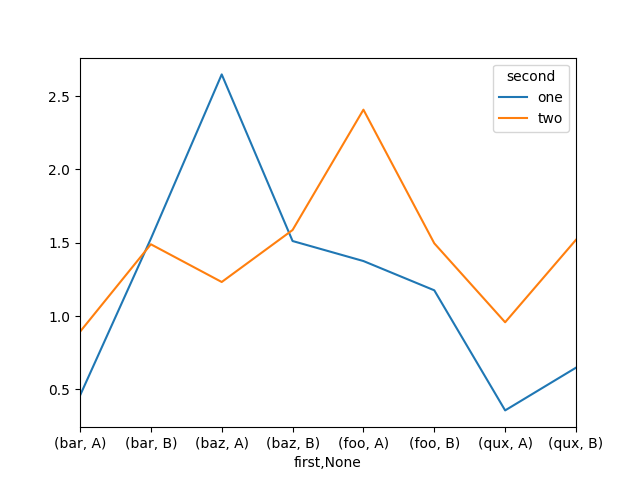

In [67]:
stun.plot()

In [69]:
tit = pd.read_csv('~/development/bigd/trypandas/titanic.csv')
tit.head()

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


<IPython.core.display.Javascript object>


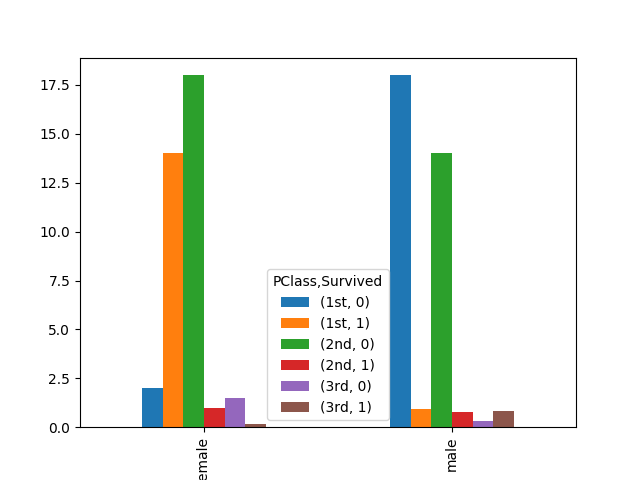

In [70]:
titpl = tit.pivot_table(index='Sex',
                          columns=['PClass', 'Survived'],
                          values='Age',
                          aggfunc='min'
                          )
# titpl = pd.DataFrame(tit.groupby(['Sex',
#                                   'Survived',
#                                   'PClass'])['Age'].min().dropna())
# titpl
titpl.plot(kind='bar')